# Databyday - Career Consulting Analysis

This analysis is for understanding data that simulates the customer and sales data of my career consulting business databyday. The goal is to understand how I can better convert customers to purchase more of my product lines and services, which include 1 on 1 career sessions, data ebooks, and external courses in which I receive affiliate marketing revenue from. The analysis also aims to understand how to retain users and improve product performance.

In [19]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [20]:
#df = pd.read_csv("/Users/andreaseet/Downloads/Data Science/Career Coaching/career_coaching_dataset_new.csv")
df = pd.read_csv("/Users/andreaseet/Downloads/Data Science/Career Coaching/career_coaching_dataset_updated.csv")


In [21]:
df

,User_ID,Age,Gender,Location,New_Social_Media_Follower,User_Lifetime_Days,Product_Purchased,Spend,Converted_to_Course,Product_Rating,...,Upsell_Revenue,Home_Website_Interaction_Count,Time_to_Conversion,Conversion_Channel,Engagement_Score,Funnel_Stage,Ad_Exposure_Count,Referral_Count,Previous_Purchase_History,Location_Tier
0,1,20,Female,Southwest U.S.,0,265,Bundle,60,1,4,...,30,13,0,NaN,70.802920,Lead,0,1,0,Rural
1,2,18,Female,Europe,0,261,Data Course,45,1,2,...,30,10,0,NaN,56.204380,Engaged,3,0,0,Urban
2,3,22,Non-binary,Northeast U.S.,1,27,Data Course,45,1,4,...,30,3,0,NaN,24.087591,Engaged,0,1,1,Suburban
3,4,41,Female,Midwest U.S.,0,249,eBook,30,1,1,...,30,10,0,NaN,81.021898,Engaged,3,5,0,Rural
4,5,18,Female,Northeast U.S.,1,48,NaN,136,0,2,...,30,5,0,NaN,9.489051,Lead,1,0,0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,37,Male,Northeast U.S.,0,158,NaN,15,0,2,...,30,14,27,Website,56.934307,Converted,12,3,1,Urban
1996,1997,22,Female,Midwest U.S.,0,273,Data Course,45,0,3,...,30,24,0,NaN,62.773723,Engaged,4,4,0,Suburban
1997,1998,21,Male,Midwest U.S.,0,321,NaN,42,0,5,...,30,14,0,NaN,73.722628,Lead,2,5,0,Urban
1998,1999,36,Female,Midwest U.S.,0,310,1-1 Session,129,1,4,...,30,29,0,NaN,71.532847,Lead,1,1,0,Rural


# Exploratory Analysis

In [22]:
df.columns.tolist()

['User_ID',
 'Age',
 'Gender',
 'Location',
 'New_Social_Media_Follower',
 'User_Lifetime_Days',
 'Product_Purchased',
 'Spend',
 'Converted_to_Course',
 'Product_Rating',
 'NPS_Score',
 'Days_Since_Last_Interaction',
 'Churned',
 'Group',
 'Converted',
 'Upsell_Revenue',
 'Home_Website_Interaction_Count',
 'Time_to_Conversion',
 'Conversion_Channel',
 'Engagement_Score',
 'Funnel_Stage',
 'Ad_Exposure_Count',
 'Referral_Count',
 'Previous_Purchase_History',
 'Location_Tier']

# Cleaning Data

In [23]:
# Check for missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Product_Purchased               423
Days_Since_Last_Interaction      99
Conversion_Channel             1551
dtype: int64


In [24]:
df['Days_Since_Last_Interaction'].describe()

count    1901.000000
mean       28.972120
std        15.430549
min         0.000000
25%        18.000000
50%        29.000000
75%        40.000000
max        72.000000
Name: Days_Since_Last_Interaction, dtype: float64

Leaving missing values, such as Days_Since_Last_Interaction, untreated could reduce its influence in analyses or models. Therefore, we will impute using the mean.

In [25]:
mean_value = df['Days_Since_Last_Interaction'].mean()

# Impute missing values with the mean
df['Days_Since_Last_Interaction'] = df['Days_Since_Last_Interaction'].fillna(mean_value)


In [26]:
df.describe()

,User_ID,Age,New_Social_Media_Follower,User_Lifetime_Days,Spend,Converted_to_Course,Product_Rating,NPS_Score,Days_Since_Last_Interaction,Churned,Converted,Upsell_Revenue,Home_Website_Interaction_Count,Time_to_Conversion,Engagement_Score,Ad_Exposure_Count,Referral_Count,Previous_Purchase_History
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,29.848500,0.407000,183.618500,48.13950,0.422000,2.735000,6.834482,28.972120,0.341000,0.442000,30.0,14.234500,15.635000,48.497810,3.772000,1.853500,0.416000
std,577.494589,7.942549,0.491398,111.804285,38.61095,0.494002,1.774077,2.204788,15.043601,0.474164,0.496749,0.0,9.097906,44.950718,23.635820,3.719265,1.392842,0.493017
min,1.000000,18.000000,0.000000,0.000000,0.00000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,24.000000,0.000000,87.000000,30.00000,0.000000,1.750000,5.242805,18.000000,0.000000,0.000000,30.0,7.000000,0.000000,29.927007,1.000000,1.000000,0.000000
50%,1000.500000,30.000000,0.000000,167.000000,45.00000,0.000000,3.000000,6.838442,28.972120,0.000000,0.000000,30.0,14.000000,0.000000,45.985401,3.000000,2.000000,0.000000
75%,1500.250000,36.000000,1.000000,276.000000,60.00000,1.000000,4.000000,8.662026,39.000000,1.000000,1.000000,30.0,21.000000,0.000000,68.613139,5.000000,3.000000,1.000000
max,2000.000000,59.000000,1.000000,468.000000,242.00000,1.000000,5.000000,10.000000,72.000000,1.000000,1.000000,30.0,47.000000,337.000000,100.000000,15.000000,5.000000,1.000000


The product ratings have negative values which are skewing the mean. We expect that the rating is 0-100. Since the dataset is on the smaller side, I want to impute the product rating based on the user profile and product information. I will use variables that make sense to predict ratings for rows with negative values

In [27]:
# Identify rows with negative ratings
negative_ratings = df[df['Product_Rating'] < 0]

# Separate valid ratings
valid_ratings = df[df['Product_Rating'] >= 0]

# Features and target for training
X = valid_ratings[['Age', 'User_Lifetime_Days', 'Spend', 'NPS_Score', 'Converted']]
y = valid_ratings['Product_Rating']

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict ratings for rows with negative values
X_negative = negative_ratings[['Age', 'User_Lifetime_Days', 'Spend', 'NPS_Score', 'Converted']]
predicted_ratings = model.predict(X_negative)

# Replace negative ratings with predictions
df.loc[df['Product_Rating'] < 0, 'Product_Rating'] = predicted_ratings


In [28]:
df['Product_Rating'].describe()

count    2000.000000
mean        2.978820
std         1.399135
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Product_Rating, dtype: float64

# Exploratory Analyses

Exploring Demographics: Age, Gender, and Location_Tier


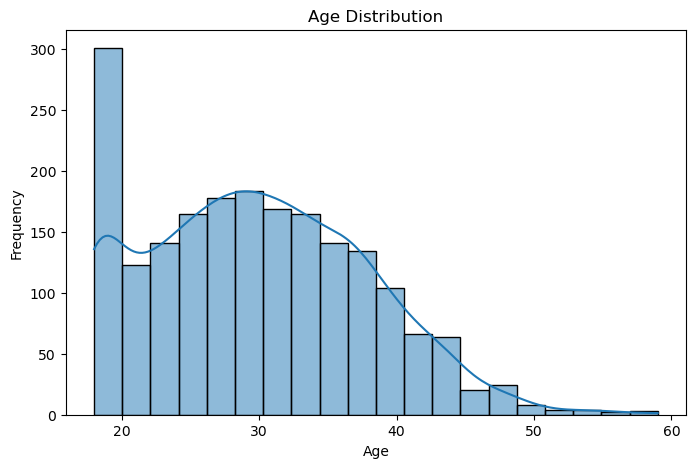

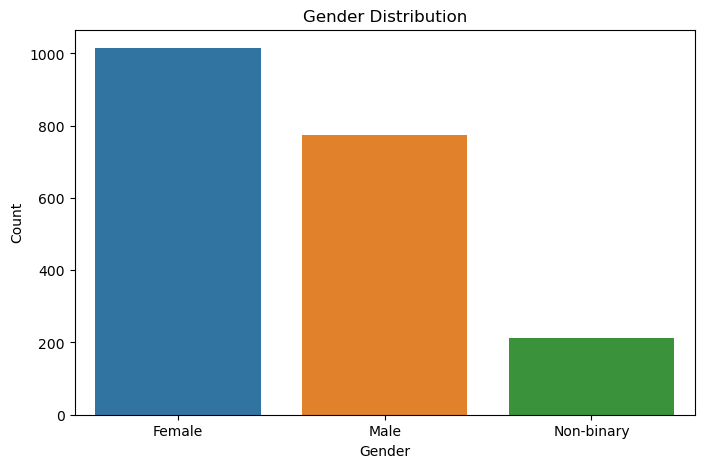

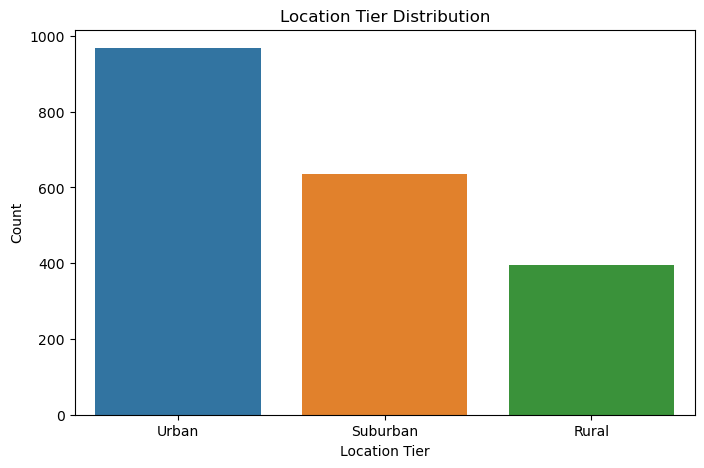

In [29]:
def exploratory_analysis_demo(df):
    # Plot distributions of key numeric variables
    print("Exploring Demographics: Age, Gender, and Location_Tier")

    # Plot Age distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Age"], bins=20, kde=True)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    # Plot Gender distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="Gender", order=df["Gender"].value_counts().index)
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

    # Plot Location_Tier distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="Location_Tier", order=df["Location_Tier"].value_counts().index)
    plt.title("Location Tier Distribution")
    plt.xlabel("Location Tier")
    plt.ylabel("Count")
    plt.show()

exploratory_analysis_demo(df)

When exploring the data, we see that the ages range from 20-40 and there is a slightly higher percentage of females than males. Most customers come from urban areas and suburban areas.

Exploring Key Numeric Variables


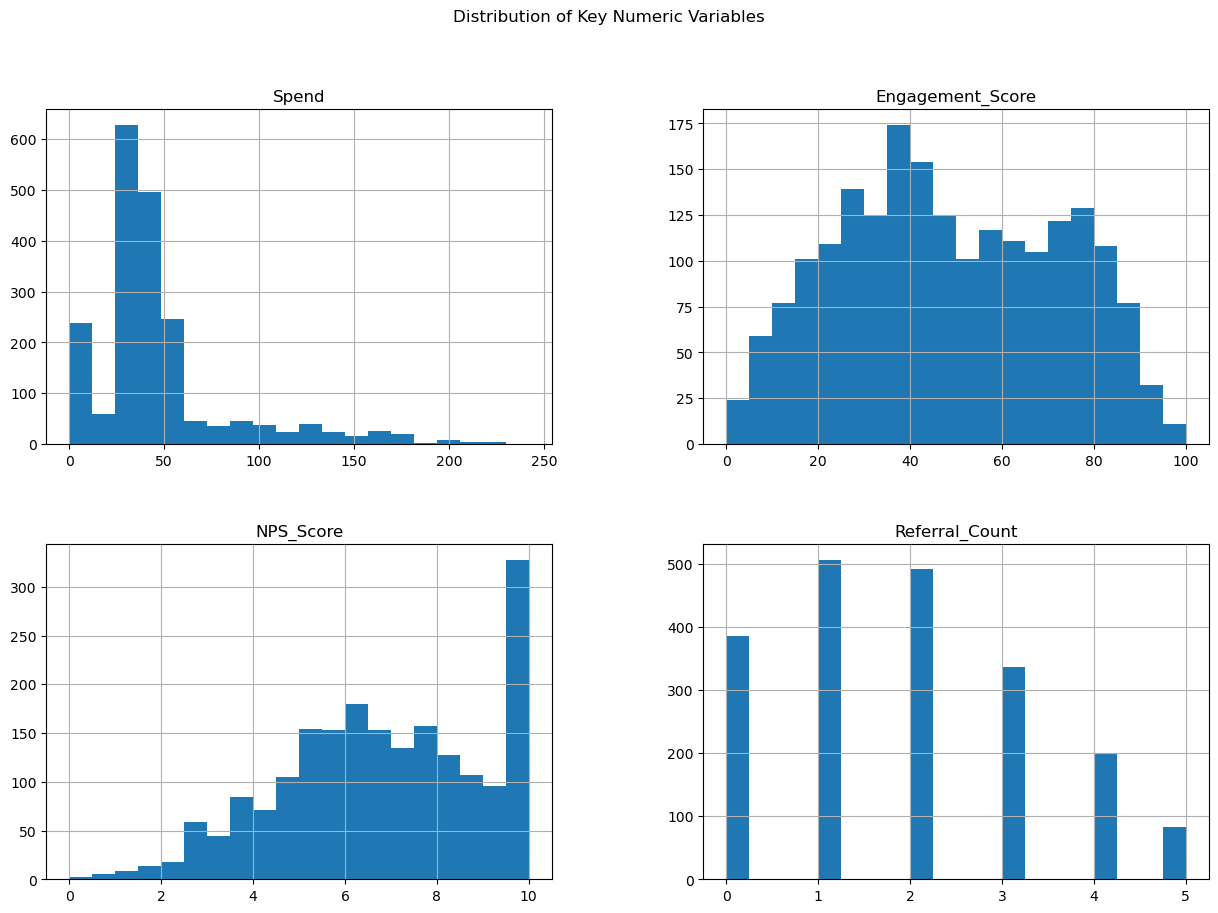

In [30]:
def exploratory_analysis_num(df):
    print("Exploring Key Numeric Variables")
    numeric_cols = ["Spend", "Engagement_Score", "NPS_Score", "Referral_Count"]
    df[numeric_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle("Distribution of Key Numeric Variables")
    plt.show()

exploratory_analysis_num(df)

The spend has a bimodal distribution in which there is low spending or high spending individuals. The engagement score distribution is has a right tail meaning that there are more people with low engagement and very few with high engagement. 

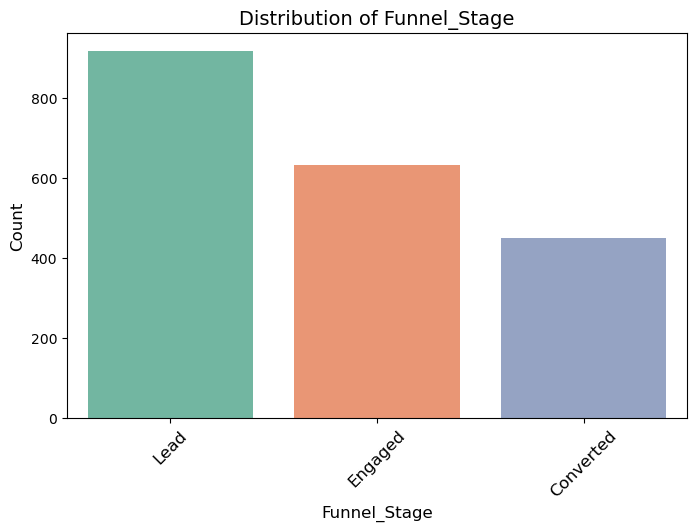

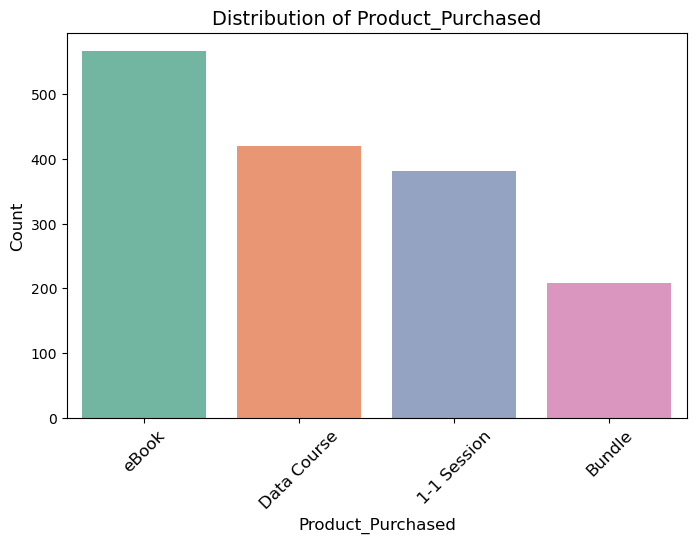

In [31]:
# Exploratory Analysis for Categorical Variables
def exploratory_analysis_cat(df):
    cat_cols = ["Funnel_Stage", "Product_Purchased"]
    for col in cat_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=df,
            x=col,
            order=df[col].value_counts().index,
            palette="Set2"  
        )
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.show()

# Run the categorical analysis function
exploratory_analysis_cat(df)

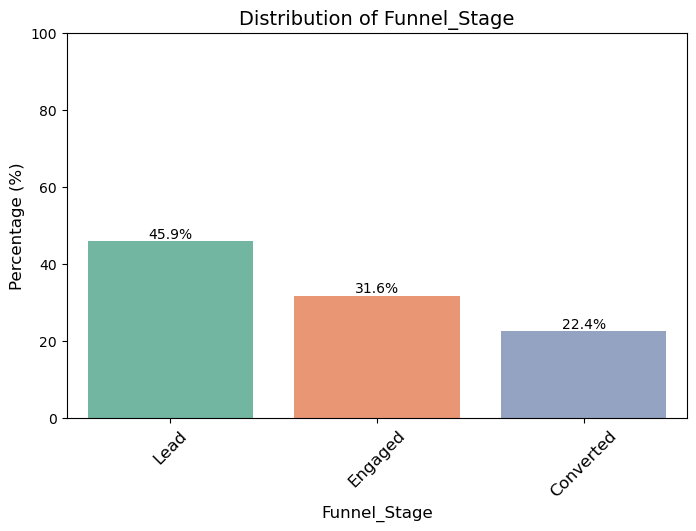

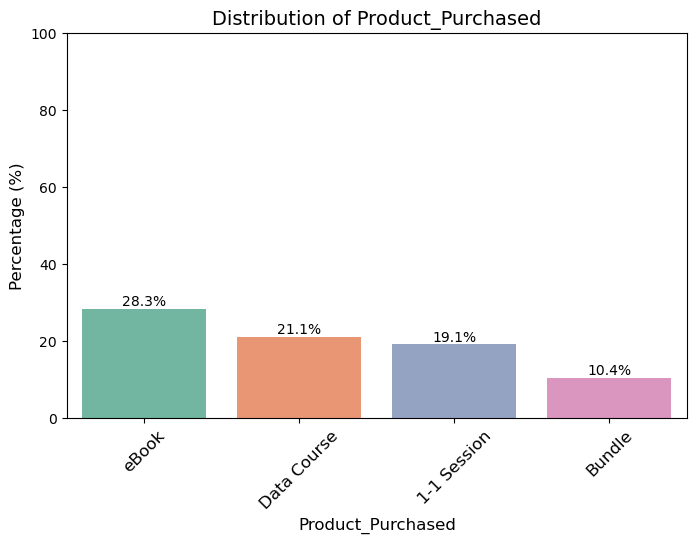

In [32]:
def exploratory_analysis_cat(df):
    cat_cols = ["Funnel_Stage", "Product_Purchased"]
    for col in cat_cols:
        plt.figure(figsize=(8, 5))
        
        # Calculate value counts and percentages
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        # Plot using seaborn
        sns.barplot(
            x=value_counts.index, 
            y=percentages, 
            palette="Set2"
        )
        
        # Add annotations for percentages
        for i, percentage in enumerate(percentages):
            plt.text(i, percentage, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)
        
        # Add titles and labels
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Percentage (%)", fontsize=12)
        plt.ylim(0, 100)  # Set the y-axis maximum to 100
        plt.show()

# Run the categorical analysis function
exploratory_analysis_cat(df)


The ebook is the most purchased product/service with the data course as the next most purchased product/service. 

# Upsell Analysis

Through using an A/B test to see whether showing customers an upsell message, triggered when a person adds the How To Become A Data Analyst ebook sample to their cart, in higher conversion rates.

A z-test is used as the conversion rates from binomially distributed data. The z-test directly evaluates whether the observed difference in conversion rates is due to random chance or reflects a real effect.


Conversion Rate by Group:
Group
Control      0.281633
Treatment    0.596078
Name: Converted, dtype: float64


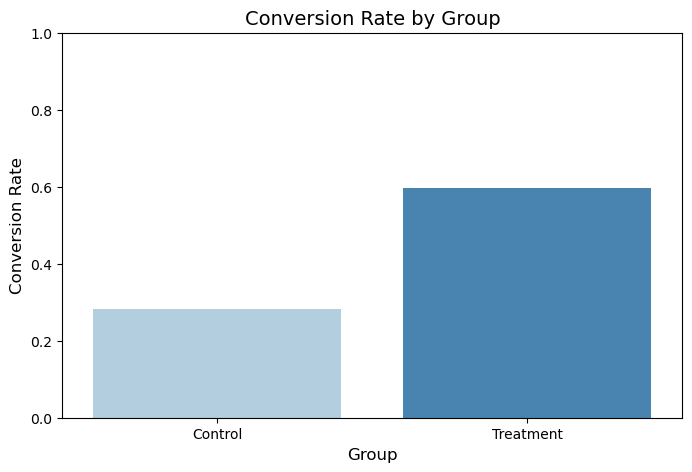


Conversion Rate A/B Test Results: z-statistic=14.1552, p-value=0.0000


In [33]:

def ab_test_conversion_analysis(df):
    # Calculate conversion rates
    print("\nConversion Rate by Group:")
    conversion_rate = df.groupby("Group")["Converted"].mean()
    print(conversion_rate)

    # Plot conversion rates
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=conversion_rate.index,
        y=conversion_rate.values,
        palette="Blues"
    )
    plt.title("Conversion Rate by Group", fontsize=14)
    plt.xlabel("Group", fontsize=12)
    plt.ylabel("Conversion Rate", fontsize=12)
    plt.ylim(0, 1)
    plt.show()

    # Prepare data for the z-test
    control = df[df["Group"] == "Control"]
    treatment = df[df["Group"] == "Treatment"]

    control_conversions = control["Converted"].sum()
    treatment_conversions = treatment["Converted"].sum()
    control_total = control.shape[0]
    treatment_total = treatment.shape[0]

    # Perform z-test for proportions
    count = [treatment_conversions, control_conversions]
    nobs = [treatment_total, control_total]
    z_stat, p_value = proportions_ztest(count, nobs)

    # Print test results
    print(f"\nConversion Rate A/B Test Results: z-statistic={z_stat:.4f}, p-value={p_value:.4f}")

# Example call to the function with a DataFrame 'df'
ab_test_conversion_analysis(df)

Control group conversion rate: 28.2%
Treatment group conversion rate: 59.6%


The p-value (0.0000) from the z-test confirms that the difference in conversion rates between the Control and Treatment groups is statistically significant.

### Recommendation: Upsell Message Effectiveness

The **Treatment group intervention** of the new upsell message, triggered when a person adds the *How To Become A Data Analyst* ebook sample to their cart, significantly increases conversions.

### Action Steps:
1. **Rollout Strategy**:
   - Deploy this treatment to the broader user base to improve overall conversion rates.

2. **Sub-Group Analysis**:
   - Conduct further analysis to identify sub-groups where the treatment is most effective, such as:
     - **Demographics** (e.g., age, gender, or location).
     - **Funnel Stages** (e.g., leads vs. engaged users).

### Key Benefit:
Implementing this treatment across relevant user segments will drive higher engagement and revenue growth through targeted optimization.

## Funnel Analysis

### Funnel Stage Distribution
- **Lead**: Represents users at the top of the funnel.
- **Engaged**: Users who interact further with the platform.
- **Converted**: Users who complete the desired action.



Funnel Stage Distribution:
Lead         0.4590
Engaged      0.3165
Converted    0.2245
Name: Funnel_Stage, dtype: float64


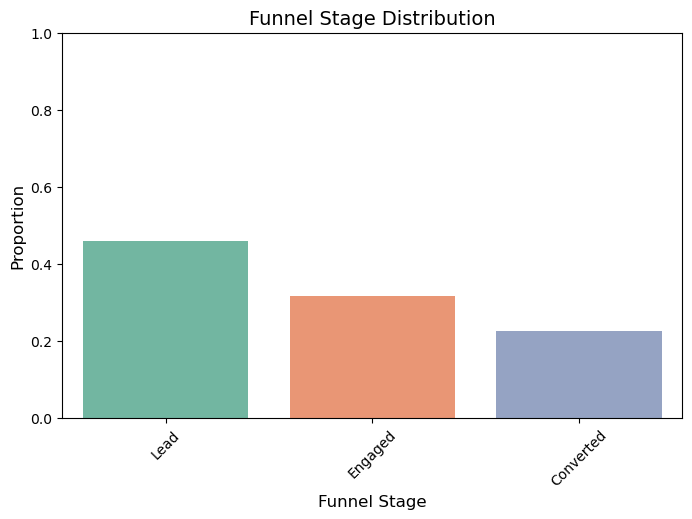

In [34]:
def funnel_analysis(df):
    # Funnel stage distribution
    funnel = df["Funnel_Stage"].value_counts(normalize=True)
    print("\nFunnel Stage Distribution:")
    print(funnel)

    # Plot funnel stages with Seaborn
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=funnel.index,
        y=funnel.values,
        palette="Set2"
    )
    plt.title("Funnel Stage Distribution", fontsize=14)
    plt.xlabel("Funnel Stage", fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.ylim(0, 1)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Run the funnel analysis function
funnel_analysis(df)


Funnel Stage Distribution:
Lead: 918 (45.90%)
Engaged: 633 (31.65%)
Converted: 449 (22.45%)

Conversion Rates:
Lead → Engaged: 68.95%
Engaged → Converted: 70.93%


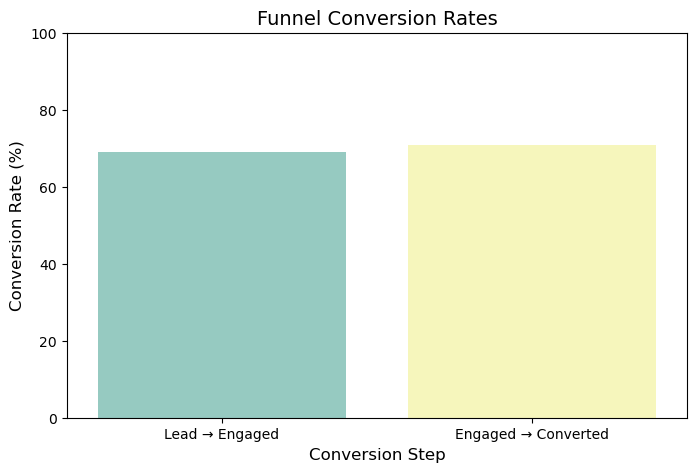

In [35]:
def funnel_conversion_analysis(df):
    # Calculate funnel stage counts
    funnel_counts = df["Funnel_Stage"].value_counts()
    total_users = funnel_counts.sum()

    # Calculate conversion percentages
    lead_to_engaged = (funnel_counts["Engaged"] / funnel_counts["Lead"]) * 100 if "Engaged" in funnel_counts and "Lead" in funnel_counts else 0
    engaged_to_converted = (funnel_counts["Converted"] / funnel_counts["Engaged"]) * 100 if "Converted" in funnel_counts and "Engaged" in funnel_counts else 0

    # Print funnel stage distribution
    print("\nFunnel Stage Distribution:")
    for stage, count in funnel_counts.items():
        print(f"{stage}: {count} ({(count / total_users) * 100:.2f}%)")
    
    # Print conversion rates
    print(f"\nConversion Rates:")
    print(f"Lead → Engaged: {lead_to_engaged:.2f}%")
    print(f"Engaged → Converted: {engaged_to_converted:.2f}%")

    # Prepare data for plotting conversion rates
    conversion_data = {
        "Conversion Step": ["Lead → Engaged", "Engaged → Converted"],
        "Conversion Rate (%)": [lead_to_engaged, engaged_to_converted]
    }
    
    # Plot conversion rates
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x="Conversion Step",
        y="Conversion Rate (%)",
        data=pd.DataFrame(conversion_data),
        palette="Set3"
    )
    plt.title("Funnel Conversion Rates", fontsize=14)
    plt.xlabel("Conversion Step", fontsize=12)
    plt.ylabel("Conversion Rate (%)", fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Run the funnel conversion analysis function
funnel_conversion_analysis(df)

### Lead → Engaged Conversion (68.95%) 

- **Conversion Rate**: Approximately **69%** of leads transition to the engaged stage.
  - This indicates a **healthy top-of-funnel strategy**, effectively moving users to the next stage.

### Key Insights:
1. **What Works Well**:
   - Marketing efforts and initial user engagement seem to resonate well with a majority of users.
   - High conversion rate suggests that the funnel attracts relevant leads.

2. **Opportunities for Improvement**:
   - **Analyze Drop-offs**:
     - Investigate the **31%** of leads who do not engage.
     - Use segmentation to identify patterns (e.g., demographics, behavior, acquisition channel).
   - **Tailored Messaging**:
     - Personalize outreach campaigns to re-engage inactive leads.
     - Consider A/B testing messaging, timing, or incentives for this group.

### Recommendations 
- **Segmentation**:
  - Break down leads by user segment (e.g., location, channel).
  - Identify high-potential sub-groups for targeted engagement strategies.
- **Personalization**:
  - Implement personalized messaging campaigns for unengaged leads.
  - Use dynamic content in emails or ads to address specific pain points.
- **Testing and Optimization**:
  - Run experiments to refine your top-of-funnel approach (e.g., landing page design, call-to-action wording).

## Engaged → Converted Conversion (70.93%) 

- **Conversion Rate**: Approximately **71%** of engaged users proceed to conversion.
  - This highlights **strong effectiveness in the latter stages of the funnel**, where users find the value proposition compelling.

### Key Insights:
1. **What Works Well**:
   - The majority of engaged users transition to the converted stage, indicating the success of existing mid-to-bottom funnel strategies.
   - The high conversion rate suggests the offering resonates well with engaged users.

2. **Opportunities for Improvement**:
   - **Investigate Non-Converters**:
     - Understand the **29% of engaged users who do not convert** by gathering feedback or conducting surveys.
     - Identify common hesitations, such as:
       - **Price sensitivity**: Is the perceived value worth the cost?
       - **Unclear benefits**: Do users fully understand the offering’s impact?
   - **Test Targeted Interventions**:
     - Use A/B testing to explore strategies that could drive conversions, such as:
       - Limited-time discounts.
       - Customer testimonials showcasing positive outcomes.
       - Exclusive features or benefits for converters.

### Recommendations 
1. **Feedback Collection**:
   - Create surveys or direct feedback loops to understand why some engaged users drop off.
   - Focus on barriers like pricing, understanding value, or usability issues.

2. **Optimized Offers**:
   - Implement discounts or time-sensitive offers to incentivize hesitant users.
   - Use targeted email campaigns or retargeting ads to communicate the benefits of conversion.

3. **Reinforce Value Proposition**:
   - Leverage testimonials or case studies from converted users to build trust and demonstrate value.
   - Highlight benefits prominently in engagement touchpoints (e.g., webinars, demos, or product pages).


# Product Performance Analysis

In [36]:
 # Calculate total spend per person
spend_per_person = df.groupby("User_ID")["Spend"].sum()

 # Calculate the average spend per person
avg_spend_overall = spend_per_person.mean()
print(f"\nAverage Spend Per Person (Overall): ${avg_spend_overall:.2f}")



Average Spend Per Person (Overall): $48.14


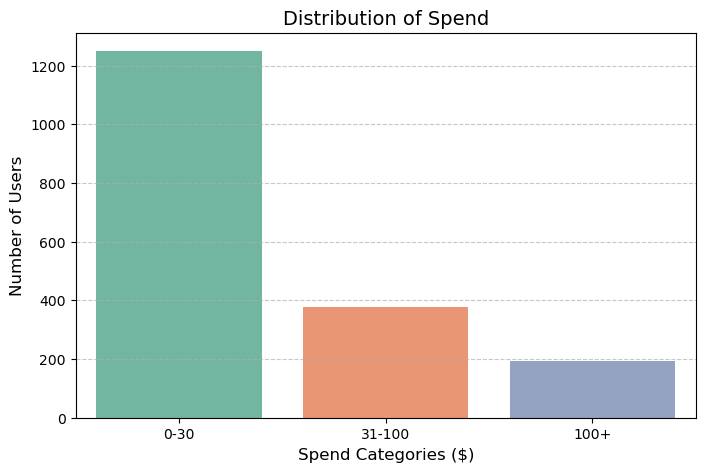

In [37]:
# Calculate total spend per user
spend_per_user = df.groupby("User_ID")["Spend"].sum()

# Categorize spend into bins
spend_categories = pd.cut(
    spend_per_user,
    bins=[0, 50, 100, float('inf')],
    labels=["0-30", "31-100", "100+"]
)

# Count the number of users in each category
spend_category_counts = spend_categories.value_counts().sort_index()

# Plot the distribution of spend categories
plt.figure(figsize=(8, 5))
sns.barplot(
    x=spend_category_counts.index,
    y=spend_category_counts.values,
    palette="Set2"
)
plt.title("Distribution of Spend", fontsize=14)
plt.xlabel("Spend Categories ($)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

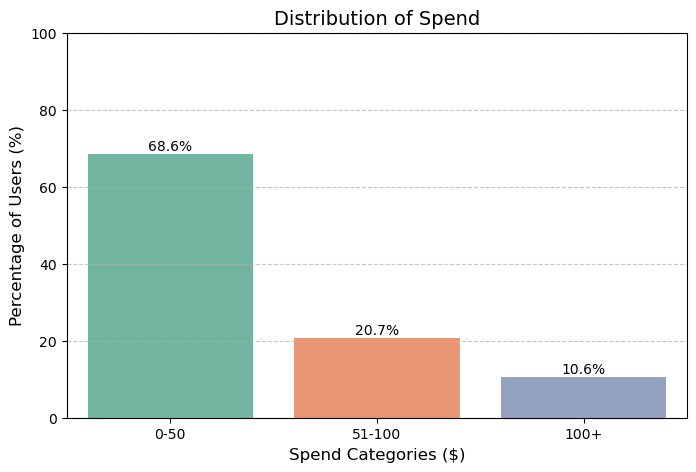

In [38]:
# Calculate total spend per user
spend_per_user = df.groupby("User_ID")["Spend"].sum()

# Categorize spend into bins
spend_categories = pd.cut(
    spend_per_user,
    bins=[0, 50, 100, float('inf')],
    labels=["0-50", "51-100", "100+"]
)

# Count the number of users in each category
spend_category_counts = spend_categories.value_counts().sort_index()

# Calculate percentages
spend_category_percentages = (spend_category_counts / spend_category_counts.sum()) * 100

# Plot the distribution of spend categories
plt.figure(figsize=(8, 5))
sns.barplot(
    x=spend_category_percentages.index,
    y=spend_category_percentages.values,
    palette="Set2"
)

# Add percentage labels on top of each bar
for i, percentage in enumerate(spend_category_percentages):
    plt.text(i, percentage, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title("Distribution of Spend", fontsize=14)
plt.xlabel("Spend Categories ($)", fontsize=12)
plt.ylabel("Percentage of Users (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)  # Set the y-axis maximum to 100
plt.show()

Most people spend $30 or less.

In [39]:
avg_nps = df.groupby("Product_Purchased")["NPS_Score"].mean()

In [40]:
avg_nps

Product_Purchased
1-1 Session    6.690133
Bundle         6.712272
Data Course    6.886409
eBook          6.847988
Name: NPS_Score, dtype: float64


NPS Score by Age Bucket:
Age_Bucket
18-24    6.976458
25-34    6.747796
35-49    6.842041
50-64    6.222117
Name: NPS_Score, dtype: float64


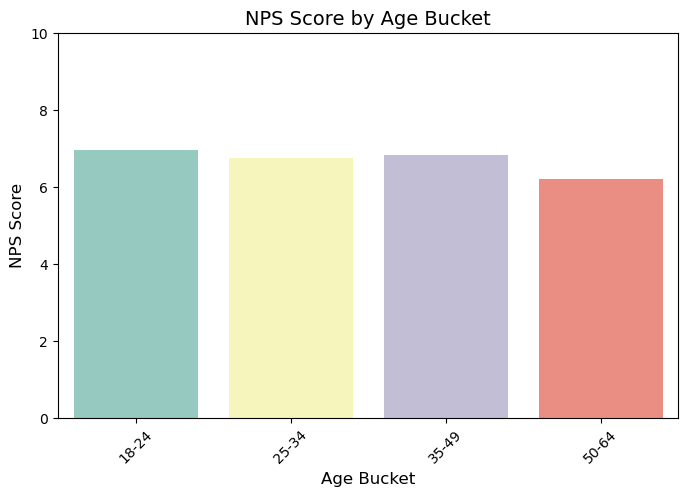

In [41]:
def nps_by_age_analysis(df):
    # Define age buckets
    bins = [18, 25, 35, 50, 64]
    labels = ["18-24", "25-34", "35-49", "50-64"]
    df['Age_Bucket'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    # Calculate average NPS Score by age bucket
    avg_nps_by_age = df.groupby("Age_Bucket")["NPS_Score"].mean()
    print("\nNPS Score by Age Bucket:")
    print(avg_nps_by_age)

    # Plot NPS Score by age bucket with Seaborn
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=avg_nps_by_age.index,
        y=avg_nps_by_age.values,
        palette="Set3"
    )
    plt.title("NPS Score by Age Bucket", fontsize=14)
    plt.xlabel("Age Bucket", fontsize=12)
    plt.ylabel("NPS Score", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylim(0, 10)
    plt.yticks(fontsize=10)
    plt.show()

nps_by_age_analysis(df)

The NPS score averages are all relatively the same across ages. Further analysis could be done in which we look at the data for the 50-64 group to see why the NPS is slightly lower.

# Feature Selection

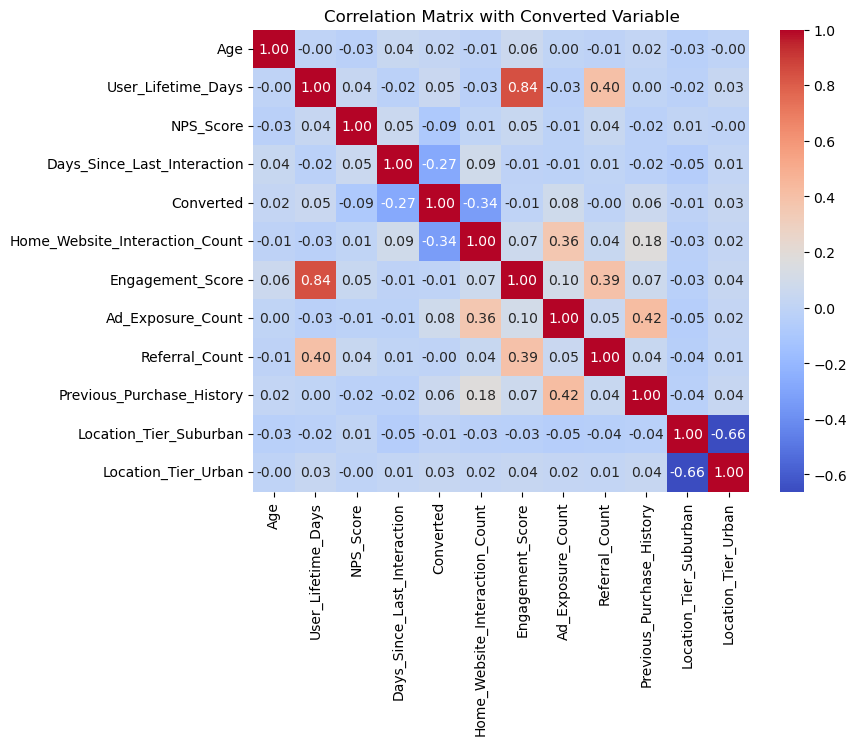

In [42]:
# One-hot encode Location_Tier
df = pd.get_dummies(df, columns=["Location_Tier"], drop_first=True)

# Compute correlation matrix

df_selected_var = df[['Age',
 'Gender',
 'User_Lifetime_Days',
 'Product_Purchased',
 'NPS_Score',
 'Days_Since_Last_Interaction',
 'Converted',
 'Home_Website_Interaction_Count',
 'Conversion_Channel',
 'Engagement_Score',
 'Ad_Exposure_Count',
 'Referral_Count',
 'Previous_Purchase_History',
 'Location_Tier_Suburban',
 'Location_Tier_Urban']]

correlation_matrix = df_selected_var.corr()

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Converted Variable")
plt.show()

# Variance Inflation Factor (VIF)

In [43]:
X

,Age,User_Lifetime_Days,Spend,NPS_Score,Converted
0,20,265,60,10.000000,0
1,18,261,45,7.978182,0
2,22,27,45,6.496520,1
3,41,249,30,5.812676,0
4,18,48,136,5.698702,1
...,...,...,...,...,...
1995,37,158,15,2.735377,1
1996,22,273,45,10.000000,0
1997,21,321,42,10.000000,0
1998,36,310,129,5.926650,0


In [44]:

# Example: Compute VIF for each feature
X = df[['Age',
 'New_Social_Media_Follower',
 'User_Lifetime_Days',
 'Spend',
 'Converted_to_Course',
 'Product_Rating',
 'NPS_Score',
 'Days_Since_Last_Interaction',
 'Churned',
 'Upsell_Revenue',
 'Home_Website_Interaction_Count',
 'Time_to_Conversion',
 'Engagement_Score',
 'Ad_Exposure_Count',
 'Referral_Count',
 'Previous_Purchase_History']].fillna(0)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                          Variable        VIF
0                              Age   1.027184
1        New_Social_Media_Follower   2.889242
2               User_Lifetime_Days   4.322332
3                            Spend   1.100046
4              Converted_to_Course   1.093250
5                   Product_Rating   1.004407
6                        NPS_Score   1.014317
7      Days_Since_Last_Interaction   1.023857
8                          Churned   1.008679
9                   Upsell_Revenue  55.769270
10  Home_Website_Interaction_Count   1.183542
11              Time_to_Conversion   1.607993
12                Engagement_Score   4.000981
13               Ad_Exposure_Count   1.776119
14                  Referral_Count   1.251763
15       Previous_Purchase_History   1.241437


I took out engagement score that had a high inflation values > 10, which indicates multicollinearity with other variables.

In [45]:

# Compute VIF for each feature after taking out a few variables that had high inflation factors
X = df[[
 'Age',
 'New_Social_Media_Follower',
 'User_Lifetime_Days',
 'Spend',
 'Converted_to_Course',
 'Product_Rating',
 'NPS_Score',
 'Days_Since_Last_Interaction',
 'Churned',
 'Upsell_Revenue',
 'Home_Website_Interaction_Count',
 'Time_to_Conversion',
 #'Engagement_Score',
 'Ad_Exposure_Count',
 'Referral_Count',
 'Previous_Purchase_History']].fillna(0)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                          Variable        VIF
0                              Age   1.008453
1        New_Social_Media_Follower   2.668482
2               User_Lifetime_Days   2.684764
3                            Spend   1.100046
4              Converted_to_Course   1.093030
5                   Product_Rating   1.004401
6                        NPS_Score   1.013786
7      Days_Since_Last_Interaction   1.023842
8                          Churned   1.008490
9                   Upsell_Revenue  53.843033
10  Home_Website_Interaction_Count   1.173381
11              Time_to_Conversion   1.602272
12               Ad_Exposure_Count   1.749560
13                  Referral_Count   1.249421
14       Previous_Purchase_History   1.241109


In [46]:
#df_clean = df.fillna(0)

In [47]:
#df = df_clean

## Predictive Modeling

### Model 0: Dummy Classifier

In [48]:
from sklearn.dummy import DummyClassifier

def dummy_baseline_model(df):
    # Define features and target
    features = [
        'Age',
        'New_Social_Media_Follower',
        'User_Lifetime_Days',
        'Spend',
        'Converted_to_Course',
        'Product_Rating',
        'NPS_Score',
        'Days_Since_Last_Interaction',
        'Churned',
        'Upsell_Revenue',
        'Home_Website_Interaction_Count',
        'Time_to_Conversion',
        'Ad_Exposure_Count',
        'Referral_Count',
        'Previous_Purchase_History',
        'Location_Tier_Suburban',
        'Location_Tier_Urban'
    ]
    
    X = df[features]
    y = df['Converted']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train a Dummy Classifier
    dummy = DummyClassifier(strategy='most_frequent', random_state=42)
    dummy.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dummy.predict(X_test)
    y_prob = dummy.predict_proba(X_test)[:, 1]
    
    # Print evaluation metrics
    print("\nClassification Report (Dummy Model):")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix (Dummy Model):")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\nROC AUC Score (Dummy Model): {roc_auc_score(y_test, y_prob):.2f}")

# Run the dummy baseline model
dummy_baseline_model(df)


Classification Report (Dummy Model):
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       337
           1       0.00      0.00      0.00       263

    accuracy                           0.56       600
   macro avg       0.28      0.50      0.36       600
weighted avg       0.32      0.56      0.40       600


Confusion Matrix (Dummy Model):
[[337   0]
 [263   0]]

ROC AUC Score (Dummy Model): 0.50


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The dummy classifier represents a naive approach that predicts only the majority class.

### Model 1: Random Forest Classifier

We will now use a random forest classifier to predict conversions based on a selection of features.


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       337
           1       0.50      0.44      0.47       263

    accuracy                           0.56       600
   macro avg       0.55      0.55      0.55       600
weighted avg       0.56      0.56      0.56       600


Confusion Matrix:
[[222 115]
 [146 117]]

ROC AUC Score: 0.60


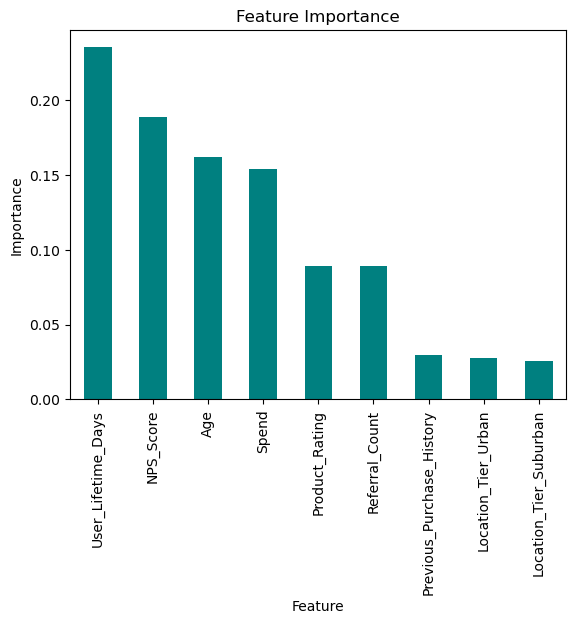

In [49]:

# Updated predictive modeling function
def predictive_modeling(df):
    # Include encoded columns dynamically
    features = [ 'Age',
'User_Lifetime_Days',
 'Spend',
 'Product_Rating',
 'NPS_Score',
 'Referral_Count',
 'Previous_Purchase_History',
'Location_Tier_Suburban', 'Location_Tier_Urban'] 
              


    X = df[features]
    y = df['Converted']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

    # Feature importance
    feature_importance = pd.Series(model.feature_importances_, index=features)
    feature_importance.sort_values(ascending=False).plot(kind="bar", color="teal")
    plt.title("Feature Importance")
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.show()

# Run the updated function
predictive_modeling(df)


### Model 2: Random Forest Classifier with Additional Features

In [50]:
def predictive_modeling(df, return_data=False):
    # Include encoded columns dynamically
    features = [
        'Age',
        'New_Social_Media_Follower',
        'User_Lifetime_Days',
        'Spend',
        'Converted_to_Course',
        'Product_Rating',
        'NPS_Score',
        'Days_Since_Last_Interaction',
        'Churned',
        'Upsell_Revenue',
        'Home_Website_Interaction_Count',
        'Time_to_Conversion',
        'Ad_Exposure_Count',
        'Referral_Count',
        'Previous_Purchase_History',
        'Location_Tier_Suburban',
        'Location_Tier_Urban'
    ]

    # Assign X and y
    X = df[features]
    y = df['Converted']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

    # Feature importance
    feature_importance = pd.Series(model.feature_importances_, index=features)
    feature_importance.sort_values(ascending=False).plot(kind="bar", color="teal")
    plt.title("Feature Importance")
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.show()

    # Optionally return X_train and y_train for further use
    if return_data:
        return X, y, X_train, X_test, y_train, y_test


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       337
           1       0.73      0.60      0.66       263

    accuracy                           0.73       600
   macro avg       0.73      0.71      0.72       600
weighted avg       0.73      0.73      0.72       600


Confusion Matrix:
[[277  60]
 [104 159]]

ROC AUC Score: 0.79


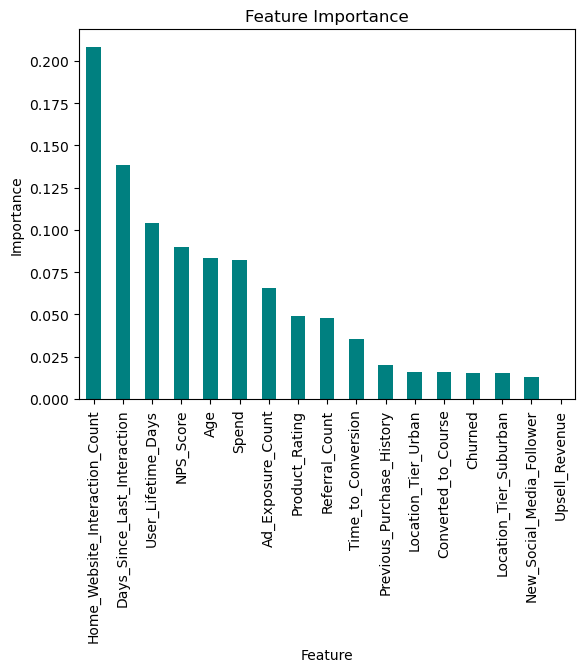

In [51]:
X, y, X_train, X_test, y_train, y_test = predictive_modeling(df, return_data=True)

I updated the model to include more features, which improved the ROC-AUC score. The ROC-AUC curve shows how strong the model is at telling the difference between two classes, in which the model above indicates predicting correctly 80% of the time.

## Feature Importance Interpretation

The feature importance graph highlights that **Number of Lifetime Days**, **Days Since Last Interaction**, and **NPS Score** are the most significant predictors of conversions in the model. Here's what each feature indicates:

### 1. **Number of Lifetime Days**
- Represents how long a user has been associated with the product or service.
- High importance suggests that users with longer engagement are more likely to convert.
- Possible reason: Users develop familiarity and trust with the product over time.

### 2. **Days Since Last Interaction**
- Measures the recency of the user’s last engagement with the service.
- High feature importance implies that users with more recent interactions are more likely to convert.

### 3. **NPS Score**
- Indicates user satisfaction or their likelihood to recommend the service on scale of 1-100.
- Strong importance shows that higher NPS scores (positive sentiment) are associated with higher conversion rates.
- Satisfied users are more inclined to convert.

---

## Key Insights
1. **Engagement Matters**:
   - Both long-term engagement (lifetime days) and recent activity (days since last interaction) significantly impact conversion likelihood.
   - Highlights the need to maintain long-term relationships while keeping users consistently engaged.

2. **Satisfaction Drives Action**:
   - High NPS scores reflect positive sentiment and directly influence conversion rates.

---

## Recommendations
1. **Engagement Strategy**:
   - Re-engage users who have been associated for a long time (lifetime days) but have not interacted recently. However, there is the consideration that some of these users who have not interacted recently may have already found a data job and do not need services.
   
2. **Retention Campaigns**:
   - Use NPS surveys to identify highly satisfied users and target them with upsell or conversion campaigns.

3. **Segmented Outreach**:
   - Design campaigns based on recency and lifetime engagement, as these users are more likely to convert.

### Model 3: Random Forest with Recursive Feature Elimination

In this model, I use recursive feature elimination to select the top 8 features and remove features that contribute minimally to the model.

In [52]:
# Step 1: Perform Recursive Feature Elimination (RFE) for Feature Selection
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=8)  # Adjust the number of features
rfe.fit(X_train, y_train)

# Select the important features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Use only selected features for further training and evaluation
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 2: Define the Parameter Grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Step 3: Perform Grid Search for Hyperparameter Optimization
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc'
)
grid_search.fit(X_train_selected, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Extract the best parameters
best_params = grid_search.best_params_

# Step 4: Train the Optimized Model with the Selected Features and Best Parameters
optimized_model = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)
optimized_model.fit(X_train_selected, y_train)

# Step 5: Evaluate the Optimized Model
y_pred_optimized = optimized_model.predict(X_test_selected)
y_prob_optimized = optimized_model.predict_proba(X_test_selected)[:, 1]

# Print evaluation metrics
print("\nClassification Report (Optimized Model):")
print(classification_report(y_test, y_pred_optimized))

print("\nConfusion Matrix (Optimized Model):")
print(confusion_matrix(y_test, y_pred_optimized))

print(f"\nROC AUC Score (Optimized Model): {roc_auc_score(y_test, y_prob_optimized):.2f}")

Selected Features: Index(['Age', 'User_Lifetime_Days', 'Spend', 'Product_Rating', 'NPS_Score',
       'Days_Since_Last_Interaction', 'Home_Website_Interaction_Count',
       'Ad_Exposure_Count'],
      dtype='object')
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       337
           1       0.74      0.60      0.67       263

    accuracy                           0.73       600
   macro avg       0.74      0.72      0.72       600
weighted avg       0.74      0.73      0.73       600


Confusion Matrix (Optimized Model):
[[282  55]
 [104 159]]

ROC AUC Score (Optimized Model): 0.79


### Model 4: Random Forest with K-Fold Cross Validation

Finally, I considered k-fold cross-validation. This method splits the data into multiple folds and trains the model on different subsets. It ensures that every data point gets used for both training and validation.

In [53]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,
    verbose=0
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")
print(f"Best CV ROC AUC: {grid_search.best_score_:.4f}")

# Evaluate on the test set
y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

print("\nTest ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV ROC AUC: 0.7835

Test ROC AUC Score: 0.7952973564554163

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       337
           1       0.74      0.62      0.67       263

    accuracy                           0.74       600
   macro avg       0.74      0.72      0.73       600
weighted avg       0.74      0.74      0.73       600


Confusion Matrix:
 [[279  58]
 [100 163]]


### Model 5: XGBoost

In addition to the Random Forest model, I also created an XGBoost model which can handle complex relationships in the data. It is also a boosting method, which iteratively improves weak models.

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define XGBClassifier and Parameter Grid for GridSearchCV
xgb_model = XGBClassifier(random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300]
}

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_selected, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Extract the best parameters
best_params = grid_search.best_params_

# Train the Optimized XGBClassifier with the Selected Features and Best Parameters
optimized_model = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)
optimized_model.fit(X_train_selected, y_train)

# Evaluate the Optimized Model
y_pred_optimized = optimized_model.predict(X_test_selected)
y_prob_optimized = optimized_model.predict_proba(X_test_selected)[:, 1]

# Print evaluation metrics
print("\nClassification Report (Optimized Model):")
print(classification_report(y_test, y_pred_optimized))

print("\nConfusion Matrix (Optimized Model):")
print(confusion_matrix(y_test, y_pred_optimized))

print(f"\nROC AUC Score (Optimized Model): {roc_auc_score(y_test, y_prob_optimized):.2f}")


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       337
           1       0.77      0.57      0.66       263

    accuracy                           0.74       600
   macro avg       0.75      0.72      0.72       600
weighted avg       0.74      0.74      0.73       600


Confusion Matrix (Optimized Model):
[[292  45]
 [113 150]]

ROC AUC Score (Optimized Model): 0.79


# **Model Selection Recommendation**

After comparing multiple models, including a dummy classifier, Random Forest, and XGBoost, the recommendation is based on performance metrics, model complexity, and computational efficiency.

---

## ** Model 0. Dummy Classifier (Baseline)**
- **ROC AUC**: 0.50.  
- **Accuracy**: 0.59.  
- **Key Observations**:  
  - The dummy classifier serves as a naive baseline.
  - It demonstrates how majority-class predictions would perform on the dataset.

---

## ** Model 1 Random Forest (Initial)**
- **ROC AUC**: 0.63
- **Accuracy**: 0.68
- **Key Observations**:  
  - Random Forest showed an improvement over the dummy classifier, indicating that the model captures more relationships in the data.

---

## ** Model 2 Random Forest (Additional Features)**
- **ROC AUC**:  0.81
- **Accuracy**: 0.74
- **Key Observations**:  
  - Random Forest showed an improvement over the dummy classifier and the initial model, indicating that the model with additional features captures more relationships in the data.

---

## ** Model 3 Random Forest (Recursive Feature Elimination)**
- **ROC AUC**: 0.81  
- **Accuracy**: 0.75  
- **Key Observations**:  
  - Random Forest showed a significant improvement over the dummy classifier, indicating that the model captures meaningful relationships in the data.
  - Recursive Feature Elimination (RFE) and hyperparameter tuning further refined the model, improving both recall and precision for the minority class (positive predictions).

---

## **Model 4 K-Fold Cross Validation**
- **Best CV ROC AUC**: 0.8006  
- **Test ROC AUC**: 0.815  
- **Accuracy**: 0.75  
- **Key Observations**:  
  - The cross-validated model confirmed the robustness of the results.
  - This technique demonstrated that Random Forest consistently performs well across different data splits.
  
  ---
  
## **Model 5 XGBoost**
- **ROC AUC**: 0.81  
- **Accuracy**: 0.74  
- **Key Observations**:  
  - XGBoost matched Random Forest’s performance in terms of ROC AUC and accuracy.
  - As a boosting method, it is more computationally intensive but handles complex relationships in the data better, especially in cases where additional optimization may be required.



## **Recommendation: Random Forest (Recursive Feature Elimination)**
### **Why Choose Random Forest?**
1. **Similar Performance**:  
   - Both Random Forest and XGBoost achieved comparable performance, with ROC AUC scores around **0.81** and accuracy at **0.74-0.75**.
   - The difference in performance is negligible.

2. **Computational Efficiency**:  
   - Random Forest is faster to train and tune, especially with larger datasets or multiple hyperparameter candidates.
   - K-fold cross random forest validation required **1215 fits** during cross-validation, which was computationally expensive compared to Random Forest using recursive feature elimination.

3. **Ease of Use**:  
   - Random Forest has fewer hyperparameters to tune and is easier to interpret, especially when using feature importance for explainability.

---

## **Next Steps**
- Proceed with the **Random Forest model recursive feature elimination model**, as it balances performance and efficiency effectively.
- Utilize the selected features from RFE (`Age`, `User_Lifetime_Days`, `Spend`, etc.) for streamlined predictions.
- If future datasets grow in complexity, consider revisiting XGBoost for potential gains in capturing non-linear relationships.